# Earthquake Data Visualization with Pandas and charts

In [166]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [167]:

POSTGRES_USER = os.environ.get("POSTGRES_USER")
POSTGRES_PASSWORD = os.environ.get("POSTGRES_PASSWORD")
POSTGRES_DB = os.environ.get("POSTGRES_DB")
POSTGRES_HOST = os.environ.get("POSTGRES_HOST")
POSTGRES_PORT = os.environ.get("POSTGRES_PORT")

In [168]:
conn = f"postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DB}"
engine = create_engine(conn)

In [169]:
query = "Select * from raw_data;"

df = pd.read_sql_query(query, conn)

df.describe()

,id,magnitude,latitude,longitude,depth,utc_time
count,179385.000000,179385.000000,179385.000000,179385.000000,179385.00000,179385
mean,89693.000000,2.154831,39.235059,-107.419263,34.07729,2023-06-10 14:57:53.423675136
min,1.000000,1.000000,-65.849700,-179.998700,-3.74000,2022-08-07 01:56:38
25%,44847.000000,1.300000,31.618907,-153.202100,5.51000,2023-01-02 00:50:12
50%,89693.000000,1.800000,39.178000,-137.763600,10.00000,2023-06-03 08:02:10
75%,134539.000000,2.500000,59.793300,-110.291000,35.00000,2023-11-14 07:35:31
max,179385.000000,7.800000,86.593900,179.999400,681.24000,2024-05-01 23:48:51
std,51784.133357,1.138389,23.116535,84.521006,65.77905,NaN


In [170]:
df2 = df.copy()

## Sort By UTC time

In [171]:
df2.sort_values(by="utc_time", ascending=False).head()

# df2.sort_values(by="utc_time", ascending=False).tail()


,id,code,event_id,place,city,country,magnitude,latitude,longitude,depth,utc_time,url,details
50800,179357,74205317,hv74205317,"6 km S of Volcano, Hawaii","Volcano, Hawaii",USA,1.8,19.386168,-155.238327,1.41,2024-05-01 23:48:51,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
50801,179358,74205307,hv74205307,"7 km S of Volcano, Hawaii","Volcano, Hawaii",USA,2.1,19.378166,-155.240997,0.08,2024-05-01 23:45:14,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
50802,179359,2024iowp,ok2024iowp,"8 km NW of Prague, Oklahoma","Prague, Oklahoma",USA,2.5,35.551754,-96.743942,0.51,2024-05-01 23:36:35,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
50803,179360,40735488,ci40735488,"9 km SW of Corona, CA","Corona, California",USA,1.3,33.817667,-117.644667,4.92,2024-05-01 23:25:35,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
50804,179361,0245m5ceko,ak0245m5ceko,"7 km NW of Meadow Lakes, Alaska","Meadow Lakes, Alaska",USA,1.4,61.675600,-149.685700,29.30,2024-05-01 23:14:43,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...


## Sort By Magnitude - highest to lowest

In [172]:
df2.sort_values(by="magnitude", ascending=False).head()

,id,code,event_id,place,city,country,magnitude,latitude,longitude,depth,utc_time,url,details
137828,86999,6000jllz,us6000jllz,"Pazarcik earthquake, Kahramanmaras earthquake ...",Pazarcik earthquake,Kahramanmaras earthquake sequence,7.8,37.2256,37.0143,10.00,2023-02-06 01:17:34,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
113782,62952,6000kd0n,us6000kd0n,southeast of the Loyalty Islands,the Loyalty Islands,southeast of the Loyalty Islands,7.7,-23.2063,170.7423,18.05,2023-05-19 02:57:03,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
111419,60589,6000kawn,us6000kawn,"82 km WNW of Hihifo, Tonga",Hihifo,Tonga,7.6,-15.6278,-174.4925,210.00,2023-05-10 16:02:00,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
60437,9604,7000lff4,us7000lff4,"19 km E of Gamut, Philippines",Gamut,Philippines,7.6,8.5266,126.4161,40.00,2023-12-02 14:37:04,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
146992,96163,7000j36j,us7000j36j,"Pulau Pulau Tanimbar, Indonesia",Pulau Pulau Tanimbar,Indonesia,7.6,-7.0586,130.0090,104.95,2023-01-09 17:47:35,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...


## Sort By Depth

In [173]:
df2.sort_values(by="depth", ascending=False).head()

,id,code,event_id,place,city,country,magnitude,latitude,longitude,depth,utc_time,url,details
136440,85611,6000k2db,us6000k2db,"208 km ENebraska of Sola, Vanuatu",Sola,Vanuatu,4.0,-13.1462,169.3241,681.24,2023-04-01 18:09:17,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
84618,33785,7000kxdn,us7000kxdn,Vanuatu region,Vanuatu region,Vanuatu region,4.2,-15.1098,171.6867,675.27,2023-09-18 15:35:27,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
35342,163899,6000mivr,us6000mivr,Fiji region,Fiji region,Fiji region,4.2,-19.3114,-177.8158,671.04,2024-03-08 22:42:23,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
163860,113032,7000ingi,us7000ingi,south of the Fiji Islands,the Fiji Islands,south of the Fiji Islands,7.0,-26.0901,178.3427,660.00,2022-11-09 09:51:04,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
163959,113130,7000inmi,us7000inmi,south of the Fiji Islands,the Fiji Islands,south of the Fiji Islands,4.9,-26.0355,178.4719,656.43,2022-11-09 18:41:04,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...


## Copy existing dataframe

In [174]:
df2.describe()

,id,magnitude,latitude,longitude,depth,utc_time
count,179385.000000,179385.000000,179385.000000,179385.000000,179385.00000,179385
mean,89693.000000,2.154831,39.235059,-107.419263,34.07729,2023-06-10 14:57:53.423675136
min,1.000000,1.000000,-65.849700,-179.998700,-3.74000,2022-08-07 01:56:38
25%,44847.000000,1.300000,31.618907,-153.202100,5.51000,2023-01-02 00:50:12
50%,89693.000000,1.800000,39.178000,-137.763600,10.00000,2023-06-03 08:02:10
75%,134539.000000,2.500000,59.793300,-110.291000,35.00000,2023-11-14 07:35:31
max,179385.000000,7.800000,86.593900,179.999400,681.24000,2024-05-01 23:48:51
std,51784.133357,1.138389,23.116535,84.521006,65.77905,NaN


When interpreting correlation coefficients, the values range from -1 to 1:

- 1 indicates a perfect positive correlation: As one variable increases, the other variable increases proportionally.
- -1 indicates a perfect negative correlation: As one variable increases, the other variable decreases proportionally.
- 0 indicates no linear correlation: There is no linear relationship between the variables.

More explaination on correlation at this [correlation-matrix article](https://builtin.com/data-science/correlation-matrix)

In [175]:
df2[["magnitude", "depth"]].corr()

,magnitude,depth
magnitude,1.00000,0.30088
depth,0.30088,1.00000


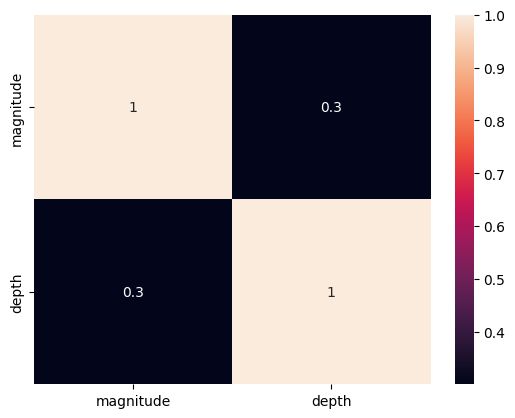

In [176]:
sns.heatmap(df2[["magnitude", "depth"]].corr(), annot=True)
plt.show()

- The correlation coefficient between "magnitude" and "magnitude" is 1, which is a perfect positive correlation. This is expected since a variable is always perfectly correlated with itself.
- The correlation coefficient between "depth" and "depth" is 1, indicating a perfect positive correlation, as expected.
- The correlation coefficient between "magnitude" and "depth" is 0.296152. This positive value indicates a positive correlation, but it's not close to 1, indicating a weak positive linear relationship between magnitude and depth.

In [177]:
df2[["magnitude", "depth", "latitude", "longitude"]].corr()

,magnitude,depth,latitude,longitude
magnitude,1.000000,0.300880,-0.629730,0.658984
depth,0.300880,1.000000,-0.194713,0.105320
latitude,-0.629730,-0.194713,1.000000,-0.476739
longitude,0.658984,0.105320,-0.476739,1.000000


- **Magnitude and Depth**: 
  - There is a weak positive correlation (0.296152) between magnitude and depth, indicating that there is a tendency for earthquakes with higher magnitudes to occur at slightly greater depths. However, the correlation is not strong.
- **Magnitude and Latitude**: 
  - There is a moderate negative correlation (-0.582706) between magnitude and latitude. This suggests that earthquakes with higher magnitudes tend to occur at lower latitudes (closer to the equator) and vice versa.
- **Magnitude and Longitude**: 
  - There is a strong positive correlation (0.672386) between magnitude and longitude. This indicates that earthquakes with higher magnitudes tend to occur at specific longitudes, and as longitude increases, the magnitude of earthquakes tends to increase as well.
- **Depth and Latitude**: 
  - There is a weak negative correlation (-0.117502) between depth and latitude, suggesting that there is a slight tendency for deeper earthquakes to occur at lower latitudes, but the correlation is not strong.
- **Depth and Longitude**: 
  - There is a weak positive correlation (0.126228) between depth and longitude, indicating a slight tendency for deeper earthquakes to occur at specific longitudes, but the correlation is not strong.
- **Latitude and Longitude**: 
  - There is a moderate negative correlation (-0.488058) between latitude and longitude, suggesting that earthquakes tend to occur at specific latitudes and longitudes. This could indicate geological features or fault lines influencing the distribution of earthquakes.

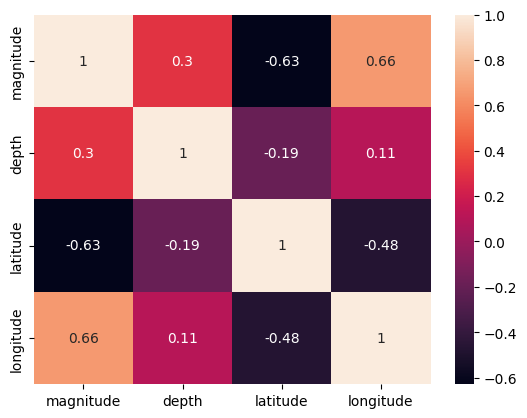

In [178]:
sns.heatmap(df2[["magnitude", "depth", "latitude", "longitude"]].corr(), annot=True)
plt.show()

In [179]:
df2.columns

Index(['id', 'code', 'event_id', 'place', 'city', 'country', 'magnitude',
       'latitude', 'longitude', 'depth', 'utc_time', 'url', 'details'],
      dtype='object')

In [180]:
df2["country"].str.contains("region").sum()

3879

In [181]:
df2["country"] = df["country"].str.replace("region", "")

In [182]:
df2["country"].str.contains("region").sum()

0

In [183]:
beginning = 120
offset = beginning + 20
df2["country"].value_counts()[beginning:offset]

country
Taiwan                                 20
South Indian Ocean                     20
Yemen                                  19
Indian Ocean Triple Junction           19
north of Svalbard                      18
Anguilla                               18
Nevada                                 17
Albania                                17
Antigua and Barbuda                    17
Guam                                   17
south of Panama                        17
Revilla Gigedo Islands                 17
Prince Edward Islands                  17
Ethiopia                               17
Norwegian Sea                          17
southern Texas                         16
Santa Cruz Islands                     16
Washington-British Columbia border     16
Mongolia                               16
Kazakhstan                             16
Name: count, dtype: int64

In [184]:
mask = df2["country"].str.contains("of")

df2.loc[mask & df2["city"].str.contains("Tonga"), "country"] = "Tonga"

df2.loc[df["city"] == "Tonga"]

,id,code,event_id,place,city,country,magnitude,latitude,longitude,depth,utc_time,url,details
16,128573,7000im8c,us7000im8c,south of Tonga,Tonga,Tonga,4.3,-24.1946,-175.7706,10.00,2022-10-30 07:12:57,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
2160,130717,7000i81r,us7000i81r,Tonga,Tonga,Tonga,4.3,-17.7870,-175.3084,238.14,2022-09-07 20:52:55,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
2903,131458,7000i8kz,us7000i8kz,south of Tonga,Tonga,Tonga,4.2,-25.3298,-174.7454,10.00,2022-09-10 12:04:09,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
7947,136504,6000inji,us6000inji,Tonga,Tonga,Tonga,4.5,-15.6999,-173.4572,96.88,2022-09-27 05:41:05,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
9093,137650,6000iply,us6000iply,south of Tonga,Tonga,Tonga,5.0,-25.6047,-175.4483,10.00,2022-09-30 11:38:34,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169501,118673,7000ismn,us7000ismn,Tonga,Tonga,Tonga,5.0,-16.7976,-173.4055,37.09,2022-11-27 01:57:13,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
170547,119719,6000j6cy,us6000j6cy,Tonga,Tonga,Tonga,4.5,-21.1812,-173.9596,10.00,2022-11-29 17:54:36,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
176818,125990,6000iwef,us6000iwef,Tonga,Tonga,Tonga,4.5,-16.7225,-174.2710,147.08,2022-10-21 02:14:57,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
177461,126633,6000iwbe,us6000iwbe,Tonga,Tonga,Tonga,4.4,-15.5121,-174.9582,249.33,2022-10-25 11:32:58,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...


In [185]:
mask = df2["country"].str.contains("Fiji")

df2.loc[mask, "country"] = "Fiji"

df2.loc[df["country"] == "Fiji"]

,id,code,event_id,place,city,country,magnitude,latitude,longitude,depth,utc_time,url,details
500,129057,7000ilke,us7000ilke,"223 km E of Levuka, Fiji",Levuka,Fiji,4.2,-17.7541,-178.5968,566.01,2022-10-31 20:22:17,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
969,129526,7000in49,us7000in49,"232 km E of Levuka, Fiji",Levuka,Fiji,4.3,-17.9814,-178.4877,583.55,2022-11-02 15:37:36,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
2125,130681,7000i81p,us7000i81p,"189 km ENebraska of Levuka, Fiji",Levuka,Fiji,4.1,-17.5579,-178.9811,534.79,2022-09-07 17:19:57,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
2506,131061,7000i8im,us7000i8im,"241 km E of Levuka, Fiji",Levuka,Fiji,4.1,-17.7090,-178.4342,580.57,2022-09-09 03:33:52,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
4261,132817,7000ia57,us7000ia57,"259 km E of Levuka, Fiji",Levuka,Fiji,4.0,-17.9096,-178.2416,593.28,2022-09-15 08:23:41,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178090,127262,6000iwbh,us6000iwbh,"285 km E of Levuka, Fiji",Levuka,Fiji,4.5,-18.2195,-177.9896,633.70,2022-10-25 12:12:30,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
178127,127299,7000ikzx,us7000ikzx,"226 km ENebraska of Levuka, Fiji",Levuka,Fiji,4.6,-17.3494,-178.6885,557.91,2022-10-25 15:05:03,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
178633,127805,7000ilr5,us7000ilr5,"266 km E of Levuka, Fiji",Levuka,Fiji,4.3,-18.0285,-178.1627,589.05,2022-10-27 15:36:46,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...
178833,128005,7000ilzu,us7000ilzu,"276 km E of Levuka, Fiji",Levuka,Fiji,4.4,-18.0601,-178.0670,540.75,2022-10-28 08:50:20,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...


In [186]:
df["country"].value_counts()

country
USA                              140404
Puerto Rico                        5278
Indonesia                          2763
Philippines                        1784
Southern Alaska                    1283
                                  ...  
Northern Peru                         1
Bermuda                               1
Azores-Cape St. Vincent Ridge         1
Trinidad                              1
Bali Sea                              1
Name: count, Length: 423, dtype: int64

In [187]:
df2["country"].value_counts().head(30)

country
USA                         140404
Puerto Rico                   5278
Indonesia                     2763
Philippines                   1784
Fiji                          1469
Southern Alaska               1283
Japan                         1275
Papua New Guinea              1180
Mexico                        1093
Tonga                         1037
Chile                          971
Central Alaska                 935
Canada                         801
Japan                          767
Russia                         687
Vanuatu                        662
Northern Mariana Islands       642
Puerto Rico                    638
Turkey                         637
South Sandwich Islands         604
western Texas                  551
China                          517
U.S. Virgin Islands            495
Alaska Peninsula               480
Reykjanes Ridge                476
Argentina                      450
Taiwan                         424
Solomon Islands                406
Peru        

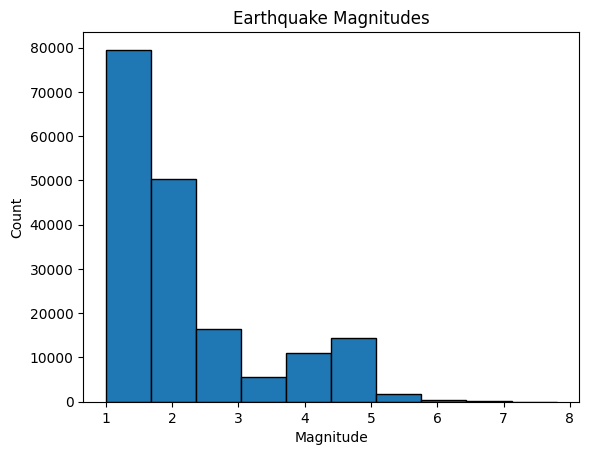

In [188]:
plt.hist(df2["magnitude"], bins=10, edgecolor="black")
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.title("Earthquake Magnitudes")
plt.show()

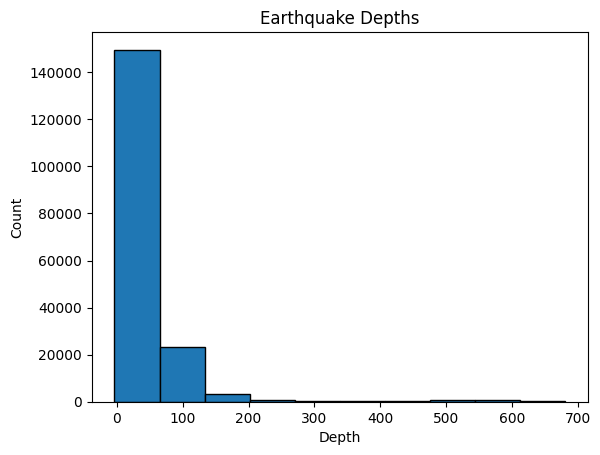

In [189]:
plt.hist(df2["depth"], bins=10, edgecolor="black")
plt.xlabel("Depth")
plt.ylabel("Count")
plt.title("Earthquake Depths")
plt.show()

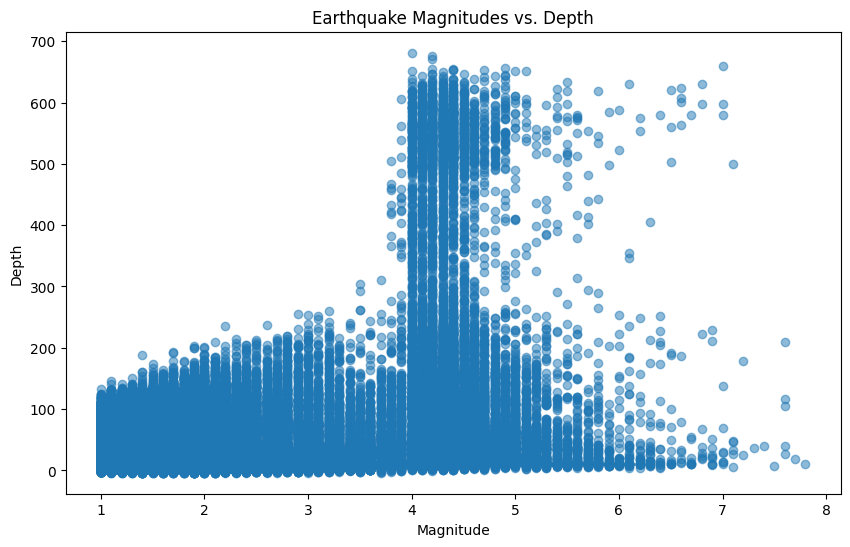

In [190]:
plt.figure(figsize=(10, 6))
plt.scatter(df2["magnitude"], df2["depth"], alpha=0.5)
plt.xlabel("Magnitude")
plt.ylabel("Depth")
plt.title("Earthquake Magnitudes vs. Depth")
plt.show()

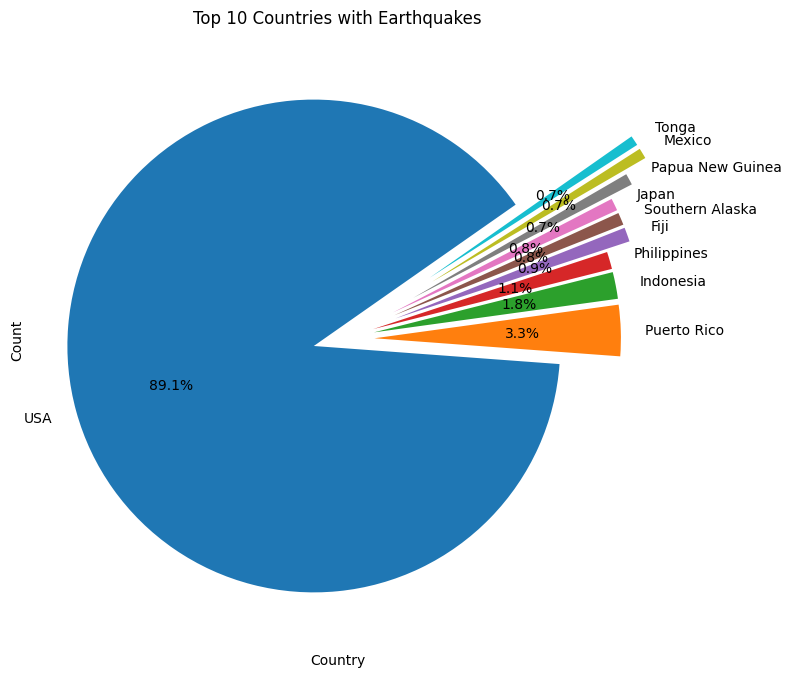

In [191]:
country_counts = df2["country"].value_counts().head(10)

explode = (0.1, 0.15, 0.15, 0.15, 0.25, 0.25, 0.25, 0.35, 0.45, 0.45)

plt.figure(figsize=(10, 8))
plt.pie(country_counts, labels=country_counts.index, explode=explode,autopct='%1.1f%%', startangle=35)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Top 10 Countries with Earthquakes")
plt.show()


In [192]:
engine.dispose()